In [1]:
from google.colab import files
uploaded=files.upload()

Saving HistoricalData_CSCO.csv to HistoricalData_CSCO.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from mlxtend.preprocessing import minmax_scaling
import seaborn as sns

import datetime
import io
dataset=pd.read_csv(io.BytesIO(uploaded['HistoricalData_CSCO.csv']))

In [3]:
dataset.head()

,Date,Close/Last,Volume,Open,High,Low
0,06/09/2021,$54.02,14861230,$54.18,$54.42,$53.935
1,06/08/2021,$54.13,15329690,$53.97,$54.39,$53.89
2,06/07/2021,$53.92,14899750,$54.32,$54.44,$53.79
3,06/04/2021,$54.07,11676700,$53.435,$54.17,$53.435
4,06/03/2021,$53.33,17593100,$52.8,$53.555,$52.62


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        2516 non-null   object
 1   Close/Last  2516 non-null   object
 2   Volume      2516 non-null   int64 
 3   Open        2516 non-null   object
 4   High        2516 non-null   object
 5   Low         2516 non-null   object
dtypes: int64(1), object(5)
memory usage: 118.1+ KB


In [5]:
dataset.shape

(2516, 6)

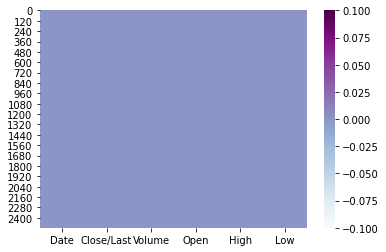

In [7]:
import seaborn as sns
sns.heatmap(dataset.isnull(),cmap='BuPu')

In [9]:
print(dataset['Date'].head())

0    06/09/2021
1    06/08/2021
2    06/07/2021
3    06/04/2021
4    06/03/2021
Name: Date, dtype: object


In [10]:
dataset['Date'] = pd.to_datetime(dataset['Date'], format="%m/%d/%Y")

In [11]:
dataset['Date'].head()

0   2021-06-09
1   2021-06-08
2   2021-06-07
3   2021-06-04
4   2021-06-03
Name: Date, dtype: datetime64[ns]

In [15]:
dataset.rename(columns=({'Close/Last':'Close'}),inplace='object')

In [16]:
dataset.columns

Index(['Date', 'Close', 'Volume', 'Open', 'High', 'Low'], dtype='object')

In [19]:
for column in dataset[['Close','Open','High','Low']]:
  dataset[column]=dataset[column].str.replace('$','')

In [20]:
dataset

,Date,Close,Volume,Open,High,Low
0,2021-06-09,54.02,14861230,54.18,54.42,53.935
1,2021-06-08,54.13,15329690,53.97,54.39,53.89
2,2021-06-07,53.92,14899750,54.32,54.44,53.79
3,2021-06-04,54.07,11676700,53.435,54.17,53.435
4,2021-06-03,53.33,17593100,52.8,53.555,52.62
...,...,...,...,...,...,...
2511,2011-06-16,15.05,72938250,14.84,15.1,14.8
2512,2011-06-15,14.84,92233370,14.96,14.99,14.78
2513,2011-06-14,15.08,91451160,15.11,15.22,14.92
2514,2011-06-13,15.06,63524720,15.14,15.28,15.04


In [18]:
dataset.describe()

,Volume
count,2.516000e+03
mean,2.999801e+07
std,1.862126e+07
min,5.720538e+06
25%,1.894481e+07
50%,2.484354e+07
75%,3.534165e+07
max,2.866235e+08


In [21]:
dataset[['Close','Open','High','Low']]=dataset[['Close','Open','High','Low']].apply(pd.to_numeric)

In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2516 non-null   datetime64[ns]
 1   Close   2516 non-null   float64       
 2   Volume  2516 non-null   int64         
 3   Open    2516 non-null   float64       
 4   High    2516 non-null   float64       
 5   Low     2516 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 118.1 KB


In [23]:
dataset.describe()

,Close,Volume,Open,High,Low
count,2516.000000,2.516000e+03,2516.000000,2516.000000,2516.000000
mean,32.407950,2.999801e+07,32.393602,32.690283,32.107097
std,11.398614,1.862126e+07,11.398170,11.501834,11.290690
min,13.730000,5.720538e+06,13.930000,14.120000,13.300000
25%,23.048750,1.894481e+07,23.117500,23.317500,22.897500
50%,29.330000,2.484354e+07,29.315000,29.535000,29.120000
75%,43.532500,3.534165e+07,43.520000,43.925000,43.020000
max,58.050000,2.866235e+08,58.130000,58.260000,57.870000


In [24]:
sum_duplicates = dataset.duplicated().sum()
sum_duplicates

0

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

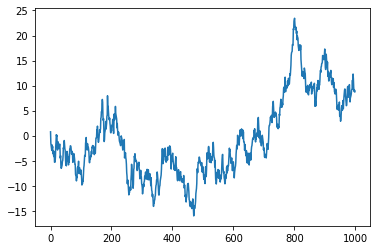

In [28]:

values=np.cumsum(np.random.randn(1000,1))
plt.plot(values)

Text(0.5, 1.0, 'Closing Price of CISCO')

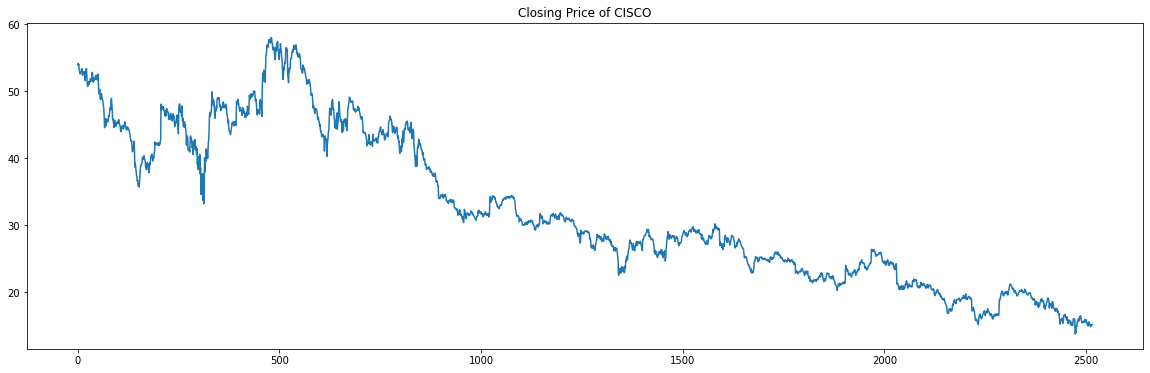

In [26]:
plt.figure(figsize=(20,6))
plt.plot(dataset['Close'], label='Close Price history')
plt.title("Closing Price of CISCO")

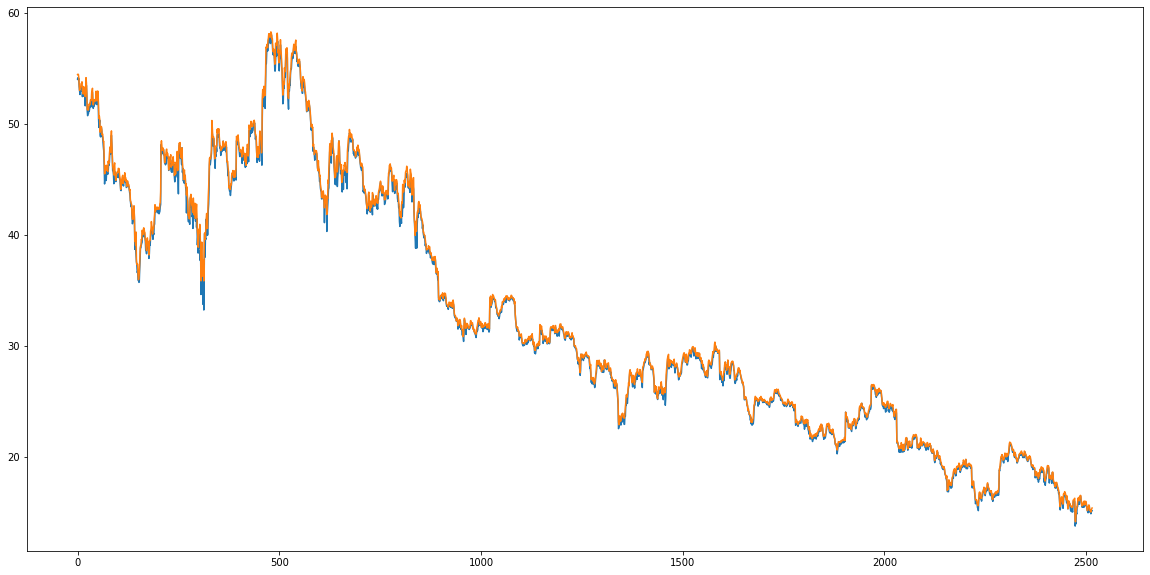

In [30]:
dataset['Close'].plot(figsize=(20,10))
dataset['High'].plot(figsize=(20,10))
plt.show()

Text(0.5, 1.0, 'Sales volume of CISCO')

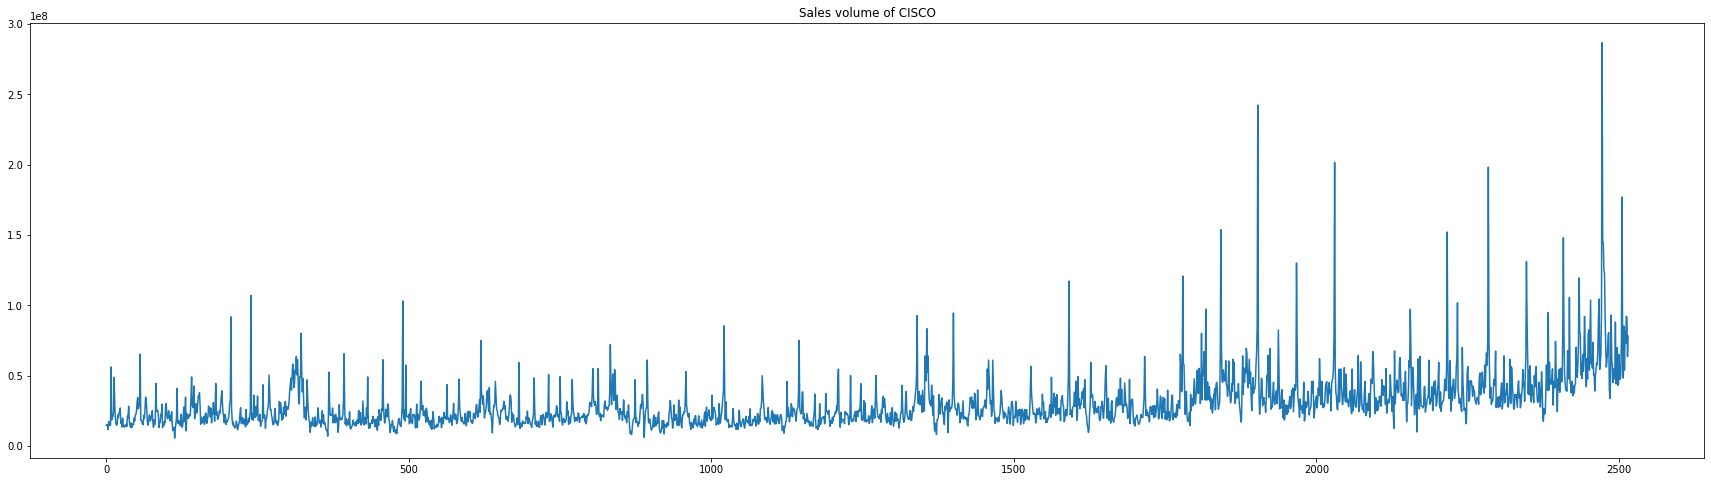

In [33]:
plt.figure(figsize=(30,8))
plt.plot(dataset['Volume'], label='sales volume history')
plt.title("Sales volume of CISCO")